In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from PIL import Image, ImageDraw
from ast import literal_eval
import matplotlib.pyplot as plt
import urllib
from tqdm.notebook import tqdm
import re
import math


In [2]:
pwd

'/kaggle/working'

In [3]:
cd /kaggle/input/

/kaggle/input


In [4]:
cp-r kerasretinanet /kaggle/working/

In [5]:
cd /kaggle/working/kerasretinanet

/kaggle/working/kerasretinanet


In [6]:
!pip install /kaggle/input/wh1files/keras_resnet-0.1.0-py2.py3-none-any.whl

Processing /kaggle/input/wh1files/keras_resnet-0.1.0-py2.py3-none-any.whl


In [7]:
data_dir = '/kaggle/input/global-wheat-detection/'
train_path = data_dir + '/train/'
test_path = data_dir + '/test/'

In [8]:
os.listdir(data_dir)

['train.csv', 'train', 'test', 'sample_submission.csv']

In [9]:
cd /kaggle/working/kerasretinanet

/kaggle/working/kerasretinanet


In [10]:
!ls snapshots


In [11]:
from keras_retinanet import models


In [12]:
model_path = '/kaggle/input/trainedmodel/keras-retinanet/snapshots/resnet50_csv_03.h5'









In [13]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [14]:
pwd

'/kaggle/working/kerasretinanet'

In [15]:
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)


Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [16]:
model_path

'/kaggle/input/trainedmodel/keras-retinanet/snapshots/resnet50_csv_03.h5'

In [17]:
li=os.listdir(test_path)
li[:5]

['cc3532ff6.jpg',
 '796707dd7.jpg',
 '53f253011.jpg',
 '51f1be19e.jpg',
 'f5a1f0358.jpg']

In [18]:
def predict(image):
    image = preprocess_image(image.copy())
    #image, scale = resize_image(image)

    boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

    #boxes /= scale

    return boxes, scores, labels

In [19]:
THRES_SCORE = 0.3

def draw_detections(image, boxes, scores, labels):
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < THRES_SCORE:
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(image, b, color=color)

        caption = "{:.3f}".format(score)
        draw_caption(image, b, caption)

In [20]:
def show_detected_objects(image_name, boxes, scores, labels):
    img_path = test_path+'/'+image_name
  
    image = read_image_bgr(img_path)
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    draw_detections(draw, boxes, scores, labels)
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()

In [21]:
samsub=pd.read_csv("/kaggle/input/global-wheat-detection/sample_submission.csv")
imgs = samsub['image_id'].values

In [22]:
import tensorflow as tf
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

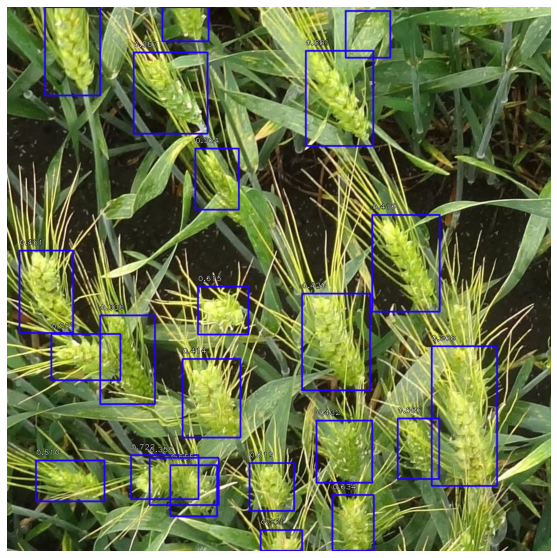

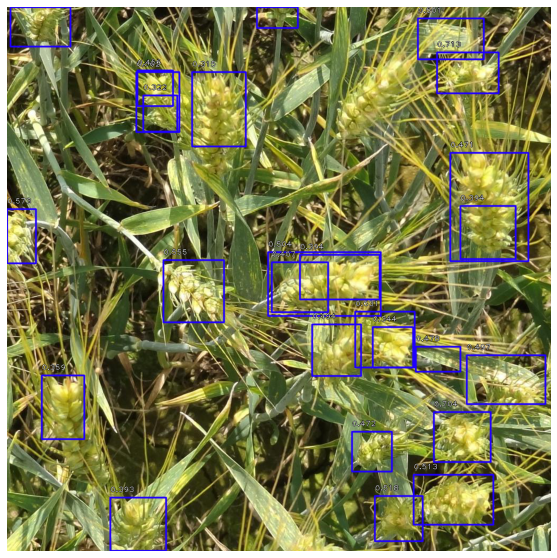

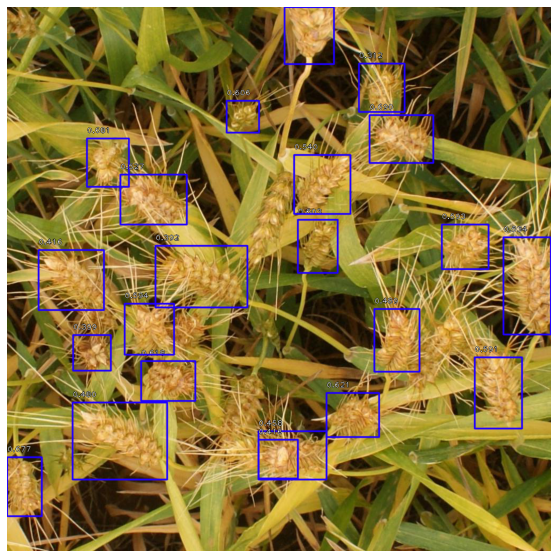

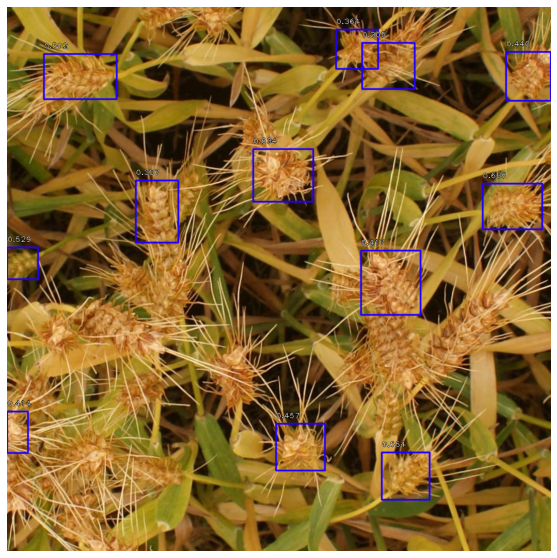

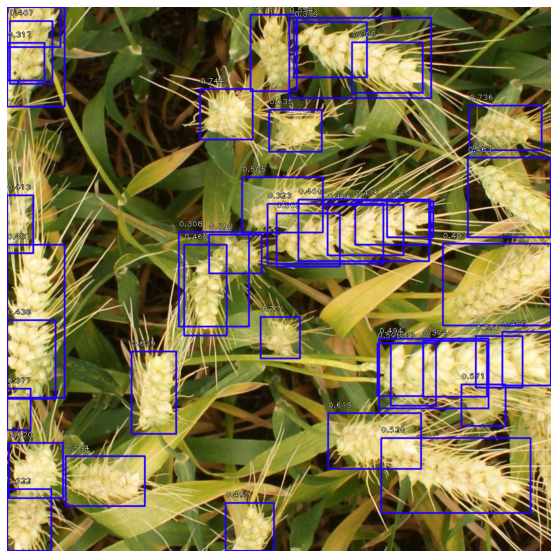

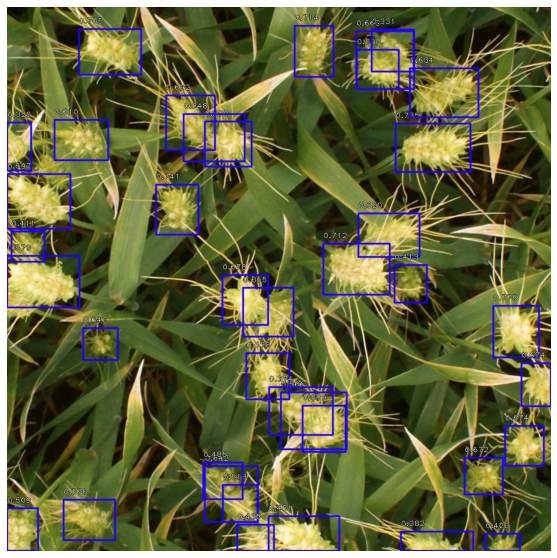

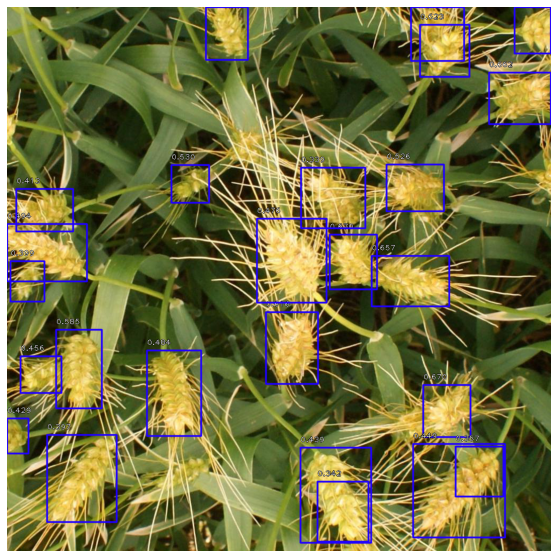

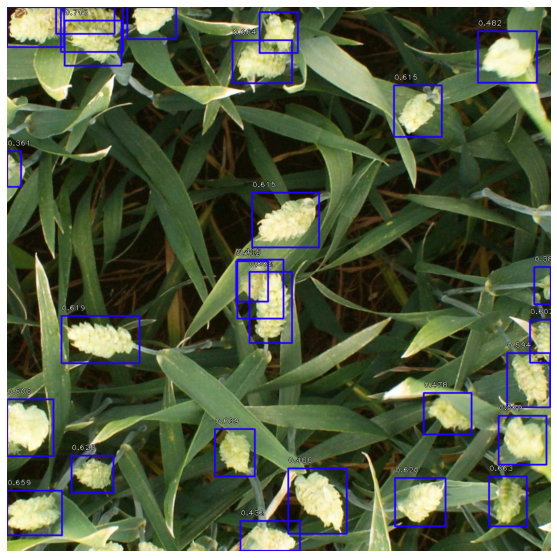

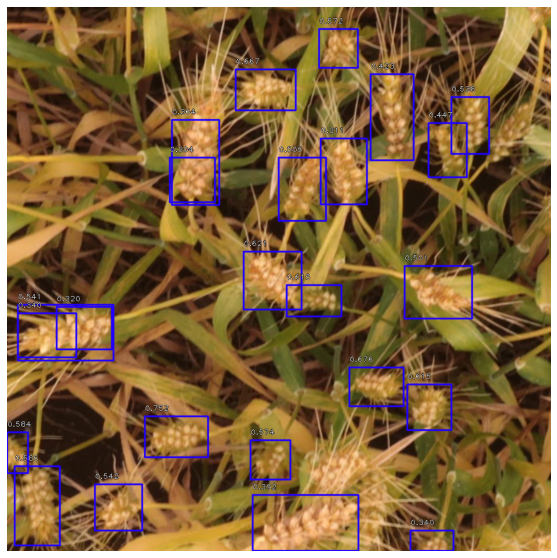

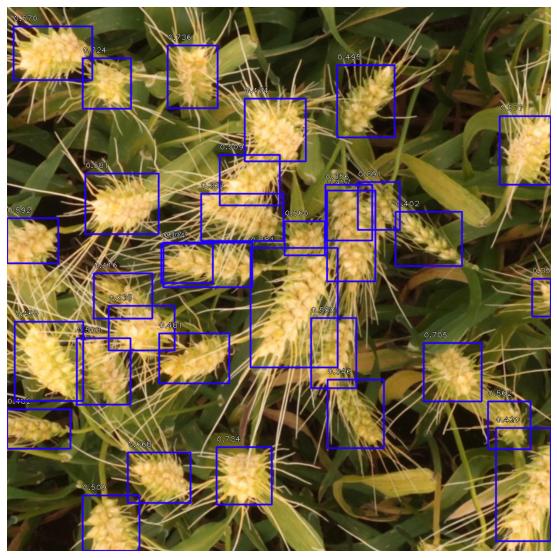

In [23]:
pred_string=[]
for img in imgs:
    preds=''
    img_name=img+'.jpg'
    img_path = test_path+'/'+img_name
    image = read_image_bgr(img_path)
    boxes, scores, labels = predict(image)
    show_detected_objects(img_name, boxes, scores, labels)
    boxes=boxes[0]
    scores=scores[0]
    for idx in range(boxes.shape[0]):
        if scores[idx]>THRES_SCORE:
            box,score=boxes[idx],scores[idx]
            preds+="{:0.2f} {} {} {} {} ".format(score, int(box[0]), int(box[1]), int(box[2]-box[0]), int(box[3]-box[1]))
    pred_string.append(preds)

In [24]:
sub={"image_id":imgs, "PredictionString":pred_string}
sub=pd.DataFrame(sub)
sub.head(10)

image_id                                   PredictionString
0  aac893a91  0.72 233 843 126 82 0.66 735 774 77 114 0.63 6...
1  51f1be19e  0.71 809 85 116 77 0.70 803 762 106 93 0.67 6 ...
2  f5a1f0358  0.69 682 203 119 89 0.68 150 247 79 91 0.68 0 ...
3  796707dd7  0.68 895 332 112 86 0.65 705 838 89 88 0.53 46...
4  51b3e36ab  0.74 363 154 98 95 0.74 870 185 136 84 0.72 47...
5  348a992bb  0.77 915 562 85 96 0.74 280 334 79 93 0.73 731...
6  cc3532ff6  0.78 374 0 78 99 0.67 607 428 89 103 0.67 783 ...
7  2fd875eaa  0.71 108 25 106 84 0.69 0 0 107 75 0.68 226 0 ...
8  cb8d261a3  0.75 259 770 118 77 0.68 644 678 102 72 0.67 4...
9  53f253011  0.74 302 72 93 118 0.73 394 828 104 108 0.72 1...

In [25]:
sub.to_csv('/kaggle/working/submission.csv',index=False)